# Exercise2 - Cameras and Lenses

## Introduction

The purpose of this exercise is to use Python to calculate camera and scene specific values.

## Learning Objectives

After completing this exercise, the student should be able to do the following:

- Create a Python function that uses the thin lens equation to compute either the focal length (f), where the rays are focused (b) or an object distance (g) when two of the other measurements are given


## Computing camera parameters

### Exercise 1

Explain how to calculate the angle $\theta$ when $a$ and $b$ is given
in the figure below. Calculate $\theta$ (in degrees) when
$a = 10$ and $b=3$ using the function `math.atan2()`. Remember to import `math` and find out what `atan2` does.

![Angle in triangel](figures/ArcTangens.png)


In [3]:
import math 
a = 10 #adjacent (x)
b = 3 #opposite (y)
#atan2 gives the angle when atan2(y,x) is called. Alternatively one could calculate tan(theta) = b/a and do arctan(result). 

theta = math.atan2(b,a) #in radians
theta_deg = theta*180/math.pi
print(theta) 
print(theta_deg)

0.2914567944778671
16.69924423399362



### Exercise 2

Create a Python function called `camera_b_distance`.

The function should accept two arguments, a focal length f and an
object distance g. It should return the distance from the lens to
where the rays are focused (b) (where the CCD should be placed)

The function should start like this:

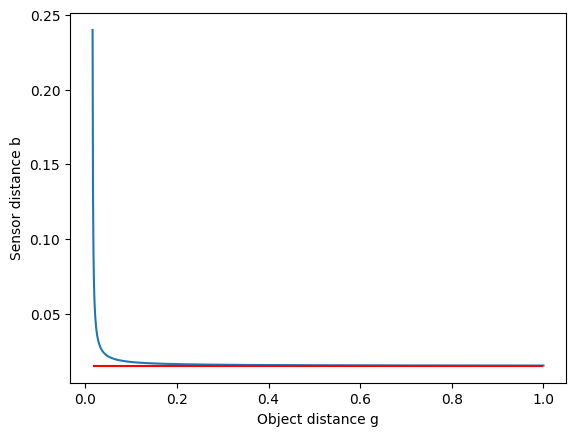

In [23]:
def camera_b_distance(f, g):
    """
    camera_b_distance returns the distance (b) where the CCD should be placed
    when the object distance (g) and the focal length (f) are given
    :param f: Focal length
    :param g: Object distance
    :return: b, the distance where the CCD should be placed
    """

    return 1/((1/f)-(1/g))


import numpy as np 
import matplotlib.pyplot as plt 

F = 15*10**(-3)
Gs = np.linspace(16e-3,1,1000)
res = camera_b_distance(f=F,g=Gs)
plt.plot(Gs,res)
plt.xlabel("Object distance g")
plt.ylabel("Sensor distance b")
plt.hlines(y=F,xmin=Gs.min(),xmax=Gs.max(),color="red")



It should be based on Gauss' lens equation:
$$\frac{1}{g} + \frac{1}{b} = \frac{1}{f}$$

You should decide if your function should calculate distances in mm or
in meters, but remember to be consistent!

Use your function to find out where the CCD should be placed when the
focal length is 15 mm and the object distance is 0.1, 1, 5, and 15
meters.

What happens to the place of the CCD when the object distance is increased?

In [20]:
camera_b_distance(np.array([15*10**(-3)]).repeat(4,axis=0),np.array([0.1,1,5,15]))

array([0.01764706, 0.01522843, 0.01504514, 0.01501502])

We notice that the sensor distance is very close to the focal length, and as g increases, 1/b becomes asymptotically 1/f, i.e. b = f



## Camera exercise

In the following exercise, you should remember to explain when
something is in mm and when it is in meters. To convert between
radians and degrees you can use:

```
angle_degrees = 180.0 / math.pi * angle_radians
```

### Exercise 3

Thomas is 1.8 meters tall and standing 5 meters from a camera. The
cameras focal length is 5 mm. The CCD in the camera can be seen in
the figure below. It is a 1/2" (inches) CCD chip and the
image formed by the CCD is 640x480 pixels in a (x,y) coordinate system.

![CCD chip](figures/CCDChip.png)

It is easiest to start by drawing the scene. The scene should
contain the optical axis, the optical center, the lens, the focal
point, the CCD chip, and Thomas. Do it on paper or even better in a
drawing program.

1. A focused image of Thomas is formed inside the camera. At which distance from the lens?
2. How tall (in mm) will Thomas be on the CCD-chip?
3. What is the size of a single pixel on the CCD chip? (in mm)?
4. How tall (in pixels) will Thomas be on the CCD-chip?
5. What is the horizontal field-of-view (in degrees)?
6. What is the vertical field-of-view (in degrees)?


In [ ]:
#1) calc b in thin-lens formula under assumption that the centre of Thomas measured by height is exactly in the optical axis 
g = 5 #distance from optical centre to object in meters
G = 1.8/2 #height of thomas, as measured from the optical axis
f = 5*10**(-3) #the focal length in metres away from the lens

b = 1/((1/f)-(1/g)) #the book defines this variable as "the point where the rays intersect", no clue what that means in practice but comes from thin lens formula (1/g)+(1/b) = 1/f
print(f"b = {b}m, very close to the focal plane")


#2) use formula 2.3 stating b/B = g/G
B = b*G/g
print(f"Thomas will be {B*2} m on the CCD chip")

#3) use common logic 
CCD_H = 4.8*10**(-3)
CCD_W = 6.4*10**(-3)
H = 480 
W = 640
#indicating that a single pixel is square and has side lengths
PIX_SIDE_LEN = CCD_H/H #we can just calculate one direction as they are in agreement 

#but it is better we just define for numerical reasons as it is simply
PIX_SIDE_LEN = 1*10**(-5)
#so the area is going to be the side-lengths multiplied, but they just ask for the side-length 

#4) how tall in pixels will thomas be on the CCD chip? 
thomas_N_pix = math.ceil(2*B / PIX_SIDE_LEN)
print(thomas_N_pix)

#5/6) Horizontal field of view: just partition into two triangles (see fig 2.10). The adj side is f whereas the opposite side (y) is the sensor dimension in the direction
def rad_to_deg(rad): 
    return rad*(180/math.pi)
FOV_HORZ = 2*rad_to_deg(math.atan2(CCD_W/2,f)) #we need to multiply be two because we only calculate for one triangle (the half-angle) and FOV is the complete angle covered
FOV_VERT = 2*rad_to_deg(math.atan2(CCD_H/2,f)) #and ofc divide dim by 2 because we work with half-triangle 
print(FOV_HORZ,FOV_VERT)





b = 0.005005005005005005m, very close to the focal plane
Thomas will be 0.0018018018018018018 m on the CCD chip
181
65.23848614238565 51.28201164861056
